### Exploratory data analysis

- Preparing data
    - Import
    - Explore: Class Imbalance, Positive class and Negative clas; skew
    - Split
    - Resample: Undersampling and oversampling
- Build Model
    - Baseline
    - Iterate
    - Evaluate: Confusion Matrix
- Communicate Results
    - Feature importances
    - Save model as a file: Binary mode

In [1]:
import pandas as pd
import gzip
import pickle
import json

import matplotlib.pyplot as plt
import seaborn as sns
import wqet_grader
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#### Data Wrangling

In [2]:
def wrangle(filename):
    # Open compressed file, load into dictionary
    with gzip .open(filename) as f:
        data = json.load(f)
    # Load dictionaary into a Dataframe
    df = pd.DataFrame().from_dict(data["data"]).set_index("company_id")
    return df

In [3]:
df=wrangle("./data/poland-bankruptcy-data-2009.json.gz")

#### Exploratory Data Analysis

    - Check for missing data
    - Check for datatype

In [4]:
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [5]:
# Inspect the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   float64


In [6]:
df["bankrupt"].value_counts()

bankrupt
False    9510
True      467
Name: count, dtype: int64

<Axes: xlabel='Bankrupt', ylabel='Frequency'>

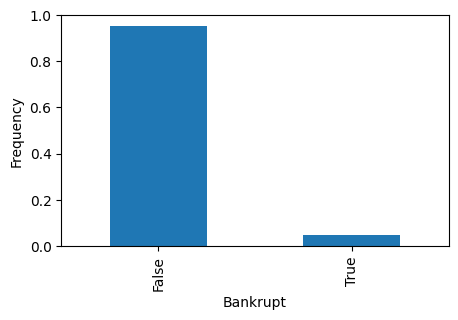

In [7]:
# Check class imbalance
df["bankrupt"].value_counts(normalize=True).plot(
    kind="bar",
    figsize=(5,3),
    xlabel="Bankrupt",
    ylabel="Frequency"
)


    Positive and Negative Classes
    

How do we define the positive and negative class?

    - We ask ourselves a question, what do we want to find out with this data?
    - In this case, the question is, "Will this company go bankrupt?"
    - Or in our Trading case, "Will the price go up?"

    The class that is associated with a Yes, is our positive class. And No is our negative class.
    
    - In our case, our positive class is going backrupt? Yes and True and Positive class.
    - It has nothing to do with the majority or minority class.

<p style="color: yellow; font-size:20px">Check one of the Feature</p>
    
    - Feature 27 - Profit/Expenses

Text(0.5, 1.0, 'Distribution of Profit/Expenses Ratio , by Class')

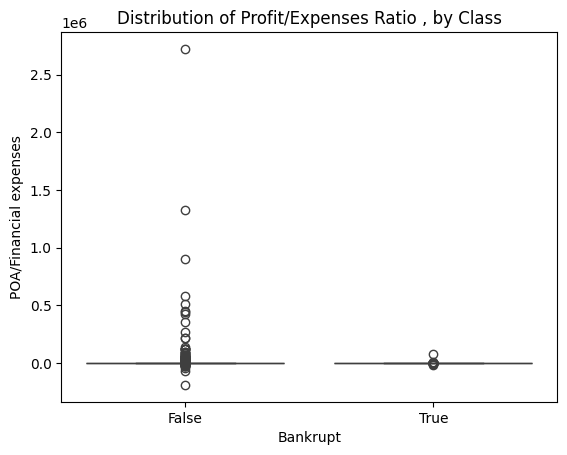

In [8]:
sns.boxplot(x="bankrupt",y="feat_27", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA/Financial expenses")
plt.title("Distribution of Profit/Expenses Ratio , by Class")

In [9]:
df["feat_27"].describe().apply("{0:,.0f}".format)

count        9,312
mean         1,206
std         35,477
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object

Text(0.5, 1.0, 'Distribution of Profit/Expenses Ratio')

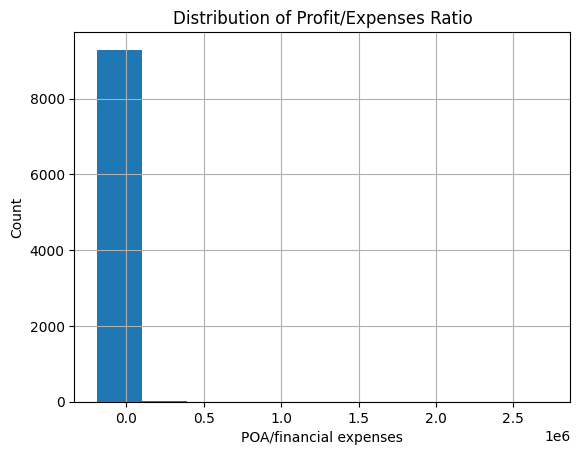

In [10]:
df["feat_27"].hist()
plt.xlabel("POA/financial expenses")
plt.ylabel("Count")
plt.title("Distribution of Profit/Expenses Ratio")

    Clipping the outliers

Text(0.5, 1.0, 'Distribution of Profit/Expenses Ratio , by Class')

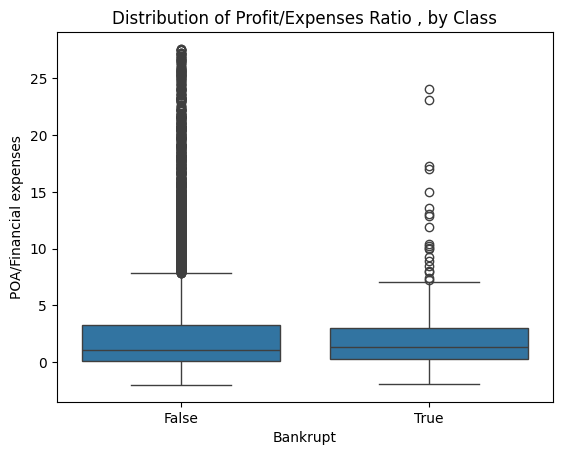

In [11]:
q1, q9=df["feat_27"].quantile([0.1,0.9])
mask = df["feat_27"].between(q1,q9)
sns.boxplot(x="bankrupt",y="feat_27", data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA/Financial expenses")
plt.title("Distribution of Profit/Expenses Ratio , by Class")

    - Correlation Heatmap

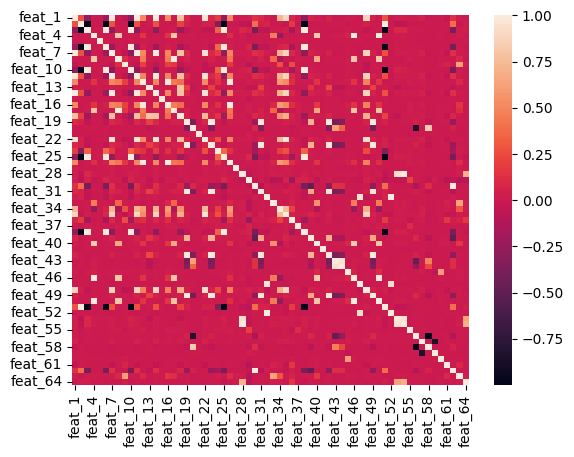

In [12]:
corr = df.drop(columns=["bankrupt"]).corr()
sns.heatmap(corr);

In [13]:
target_column = "bankrupt"
test_size = 0.2
X = df.drop(columns=target_column)
y = df[target_column].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=test_size)

In [14]:
y.value_counts()

bankrupt
0    9510
1     467
Name: count, dtype: int64

    Undersampling

In [15]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train,y_train)

In [16]:
y_train_under.value_counts(normalize=True)

bankrupt
0    0.5
1    0.5
Name: proportion, dtype: float64

    Oversampling

In [17]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over,y_train_over = over_sampler.fit_resample(X_train,y_train)
print(X_train_over.shape)


(15206, 64)


In [18]:
y_train_over.value_counts(normalize=True)

bankrupt
0    0.5
1    0.5
Name: proportion, dtype: float64

#### Building the Model

In [19]:
acc_baseline= y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:",  round(acc_baseline,4))

Baseline Accuracy: 0.9526


In [20]:
model_reg = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train,y_train)

#Fit on X_Train_under
model_under = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)

model_under.fit(X_train_under,y_train_under)

#Fit on X_Train_over
model_over = make_pipeline(
    SimpleImputer(strategy="median"),
    DecisionTreeClassifier(random_state=42)
)

model_over.fit(X_train_over,y_train_over)

,steps,"[('simpleimputer', ...), ('decisiontreeclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,criterion,'gini'


##### Model Evaluation

    Accuracy Scores

In [21]:
for m in [model_reg,model_under,model_over]:
    acc_train=m.score(X_train,y_train)
    acc_test=m.score(X_test,y_test)
    print("Training Accuracy:",round(acc_train,4))
    print("Test Accuracy:",round(acc_test,4))

Training Accuracy: 1.0
Test Accuracy: 0.9409
Training Accuracy: 0.7282
Test Accuracy: 0.7109
Training Accuracy: 1.0
Test Accuracy: 0.9364


    Confusion Matirx

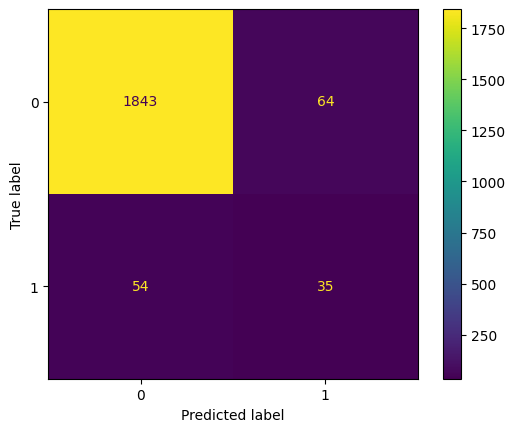

In [22]:
ConfusionMatrixDisplay.from_estimator(model_reg,X_test,y_test);

    Calculate tree depth

In [23]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

36


#### Communication

    For Non-Technical Deliverable

Text(0.5, 1.0, 'model_over Feature Importance')

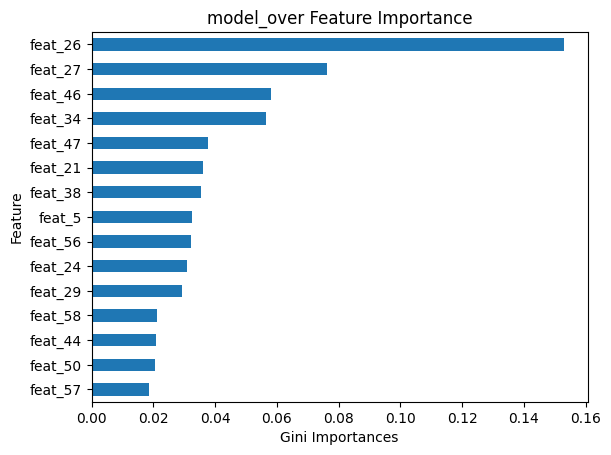

In [24]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

#Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot Series

feat_imp.tail(15).plot(kind="barh")
plt.xlabel("Gini Importances")
plt.ylabel("Feature")
plt.title("model_over Feature Importance")


In [25]:
# Get importances
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

#Put importances into a Series
feat_imp = pd.Series(importances, index=X_train_over.columns).sort_values()

# Plot Series

# feat_imp.plot(kind="barh", figsize=(15,15))

    Save model in a file

In [26]:
# Save your model as 'model-5-2.pkl'

with open("model-5-2.pkl","wb") as f:
    pickle.dump(model_over,f)

    Load and use the model

In [27]:
with open("model-5-2.pkl","rb") as f:
    loaded_model = pickle.load(f)
print(loaded_model)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])


    Submit Assignment

In [28]:
# with open("model-5-2.pkl","rb") as f:
#     loaded_model = pickle.load(f)
#     wqet_grader.grade(
#         "Project 5 Assesment",
#         "Task 5.2.16",
#         loaded_model
#     )